# Gerar dados artificiais em que só há confusão entre a classes 0 e 1

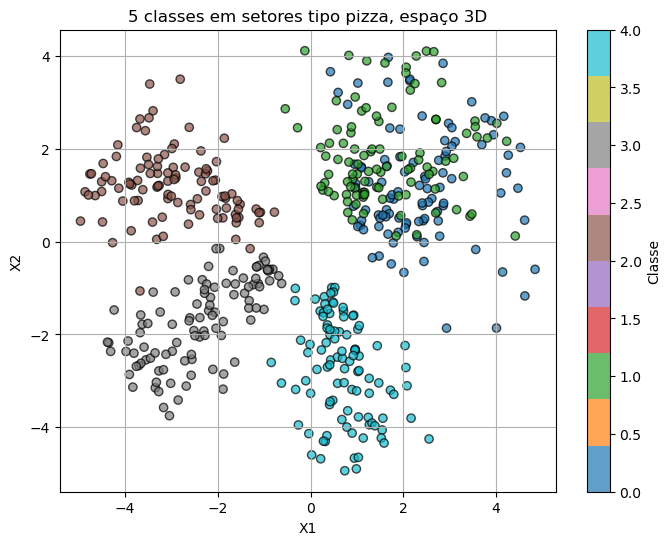

Tamanho do conjunto de treino: (400, 3)
Tamanho do conjunto de teste: (100, 3)


In [93]:
import numpy as np
import matplotlib.pyplot as plt
from CLog_MC_Ecoc import CLog_Ecoc
from utils import plot_decision_boundary
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split

# Gerar os dados
X, y = gerar_classes_pizza(n_classes=5, n_pontos_por_classe=100, raio_min=1, raio_max=5, ruido_angular = [.4, .4, .2, .2, .2], delta_angulos = [.45, -.45, +0.2, 0, -.1])

# Visualizar
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', edgecolor='k', alpha=0.7)
plt.title("5 classes em setores tipo pizza, espaço 3D")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis("equal")
plt.grid(True)
plt.colorbar(scatter, label="Classe")
plt.show()

#Regualariza os dados
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std
print(f'Tamanho do conjunto de treino: {x_train.shape}')
print(f'Tamanho do conjunto de teste: {x_test.shape}')


In [87]:
def TreinaModelo(x_train, y_train, x_test, y_test, dropCols = None):
    model = CLog_Ecoc(n_iter=1000, batch_size=None, kernel=2, step=0.01, mode='dual', iterative=False)
    if dropCols is not None:
        dropCols = model.generateEcocTable(5, dropCols = dropCols)
    model.fit(x_train, y_train, ECOCTable = dropCols)
    
    y_pred = model.predict(x_train)
    accuracy = accuracy_score(y_train, y_pred)
    print(f'Acurácia de treino: {accuracy:.2f}')
    
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Acurácia de teste: {accuracy:.2f}')
    #plot_decision_boundary(model, x_test, y_test, resolution=300)
    confusionMatrix(y_test, y_pred, model.classes_)
    print("ECOC Table:\n", model.codes)
    return model

def gerar_classes_pizza(n_classes=5, n_pontos_por_classe=100, raio_min=1, raio_max=5, ruido_angular=None, delta_angulos = None):
    X = []
    y = []

    if ruido_angular is None:
       ruido_angular = np.full(n_classes, 0.2)
    for classe in range(n_classes):
        # Ângulo central do setor para a classe
        angulo_central = 2 * np.pi * classe / n_classes
        if delta_angulos is not None:
            angulo_central += delta_angulos[classe]
        
        # Geração de ângulos ao redor do centro, com ruído
        angulos = np.random.normal(loc=angulo_central, scale=ruido_angular[classe], size=n_pontos_por_classe)
        
        # Raio aleatório entre min e max
        raios = np.random.uniform(low=raio_min, high=raio_max, size=n_pontos_por_classe)
        
        # Converter para coordenadas cartesianas
        x = raios * np.cos(angulos)
        y_coords = raios * np.sin(angulos)
        z_coords = np.random.uniform(low=-1, high=+1, size=n_pontos_por_classe) * raios

        X.append(np.stack((x, y_coords, z_coords), axis=1))
        y += [classe] * n_pontos_por_classe

    X = np.vstack(X)
    y = np.array(y)
    return X, y
    
def confusionMatrix(y_test, y_pred, classes):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()



# Treino com a tabela ECOC exaustiva

Será gerado output codes de tamanho 15 bits para dados com 5 classes diferentes e canônicas.
Gerando modelo para bit #1 do output code...
Gerando modelo para bit #2 do output code...
Gerando modelo para bit #3 do output code...
Gerando modelo para bit #4 do output code...
Gerando modelo para bit #5 do output code...
Gerando modelo para bit #6 do output code...
Gerando modelo para bit #7 do output code...
Gerando modelo para bit #8 do output code...
Gerando modelo para bit #9 do output code...
Gerando modelo para bit #10 do output code...
Gerando modelo para bit #11 do output code...
Gerando modelo para bit #12 do output code...
Gerando modelo para bit #13 do output code...
Gerando modelo para bit #14 do output code...
Gerando modelo para bit #15 do output code...
Acurácia de treino: 0.87
Acurácia de teste: 0.89


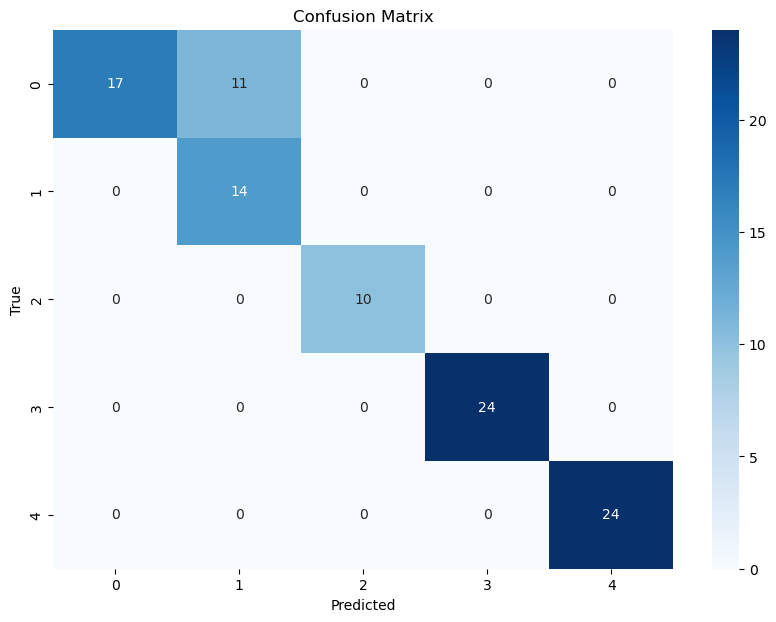

ECOC Table:
 [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 0 0 0 0 1 1 1]
 [0 0 1 1 0 0 1 1 0 0 1 1 0 0 1]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]]


In [99]:
model = TreinaModelo(x_train, y_train, x_test, y_test)

# Treino com tabela ECOC de 9 bits mal escolhidos

Será gerado output codes de tamanho 9 bits para dados com 5 classes diferentes e canônicas.
Gerando modelo para bit #1 do output code...
Gerando modelo para bit #2 do output code...
Gerando modelo para bit #3 do output code...
Gerando modelo para bit #4 do output code...
Gerando modelo para bit #5 do output code...
Gerando modelo para bit #6 do output code...
Gerando modelo para bit #7 do output code...
Gerando modelo para bit #8 do output code...
Gerando modelo para bit #9 do output code...
Acurácia de treino: 0.83
Acurácia de teste: 0.77


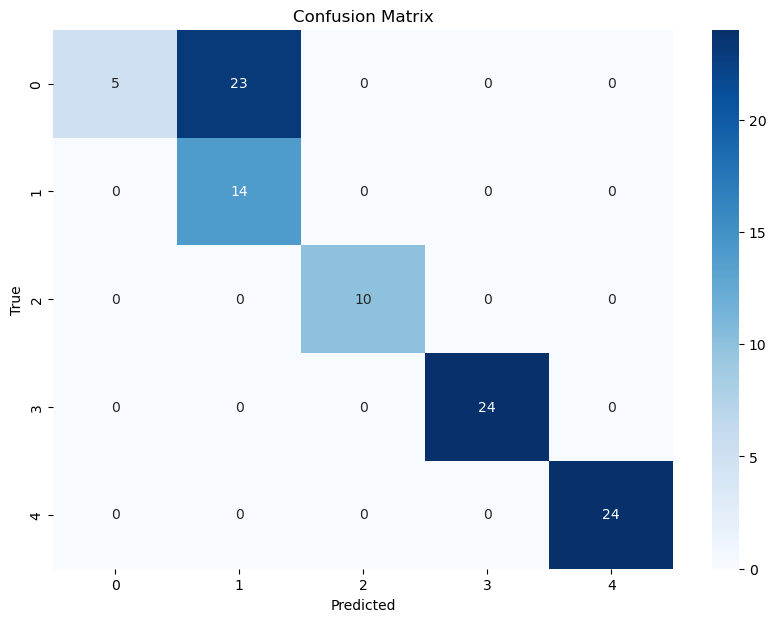

ECOC Table:
 [[1 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 1 1 1]
 [0 1 0 0 1 1 0 0 1]
 [1 0 0 1 0 1 0 1 0]]


In [95]:
model = TreinaModelo(x_train, y_train, x_test, y_test, dropCols = [0,1,2,3,4,7])

# Treino com tabela ECOC de 8 bits bem escolhidos

Será gerado output codes de tamanho 8 bits para dados com 5 classes diferentes e canônicas.
Gerando modelo para bit #1 do output code...
Gerando modelo para bit #2 do output code...
Gerando modelo para bit #3 do output code...
Gerando modelo para bit #4 do output code...
Gerando modelo para bit #5 do output code...
Gerando modelo para bit #6 do output code...
Gerando modelo para bit #7 do output code...
Gerando modelo para bit #8 do output code...
Acurácia de treino: 0.87
Acurácia de teste: 0.88


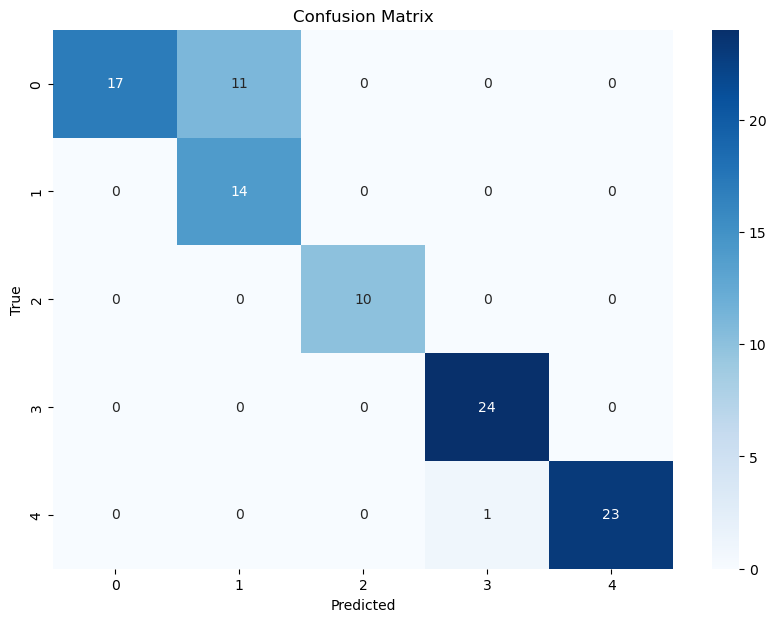

ECOC Table:
 [[1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1]
 [0 0 1 1 0 0 1 1]
 [0 1 0 1 0 1 0 1]]


In [101]:
model = TreinaModelo(x_train, y_train, x_test, y_test, dropCols = [8,9,10,11,12,13,14])

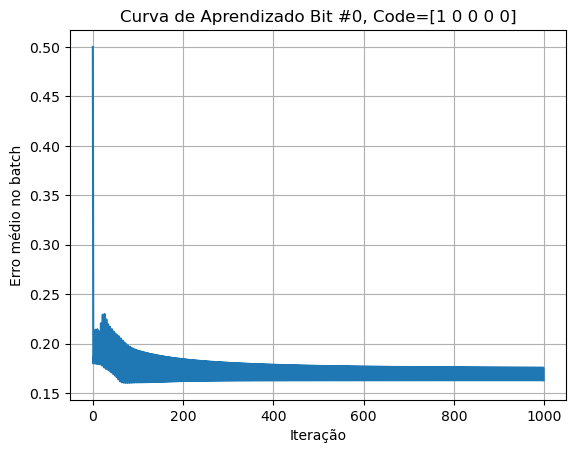

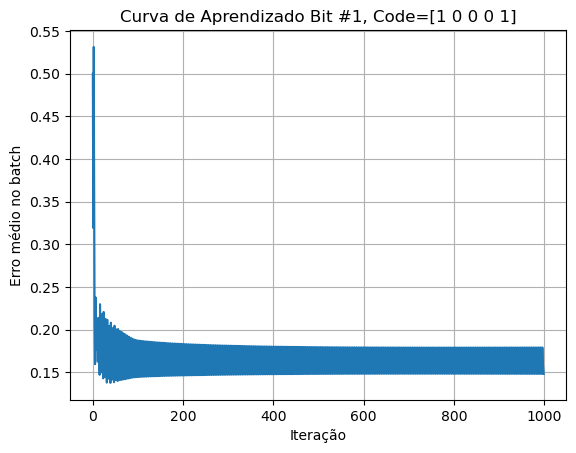

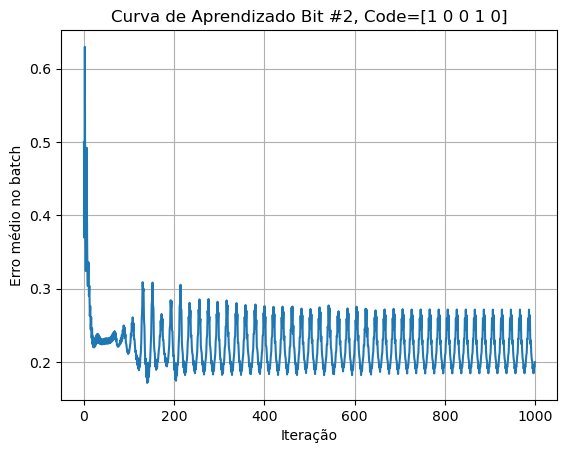

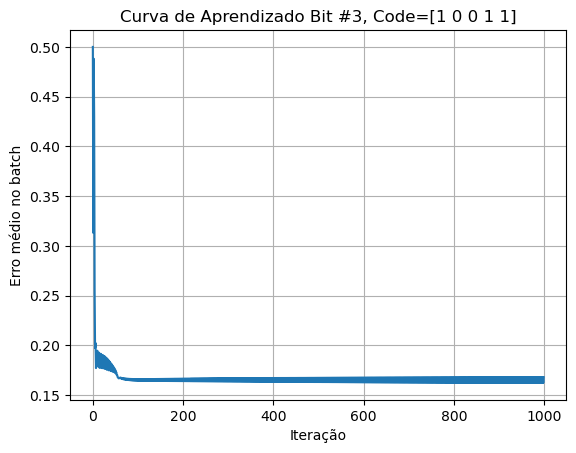

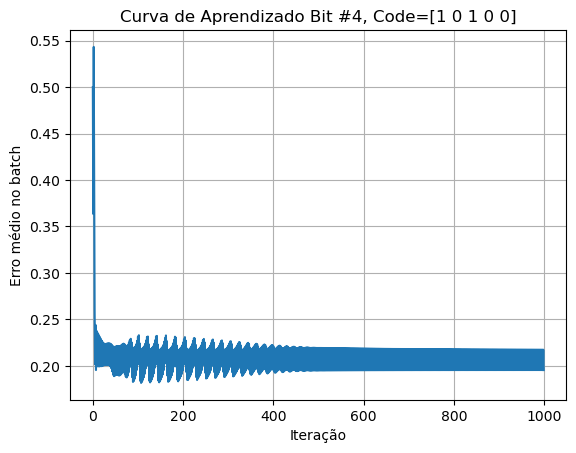

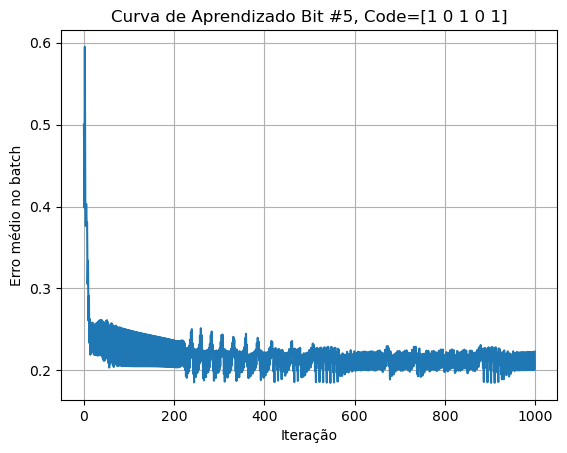

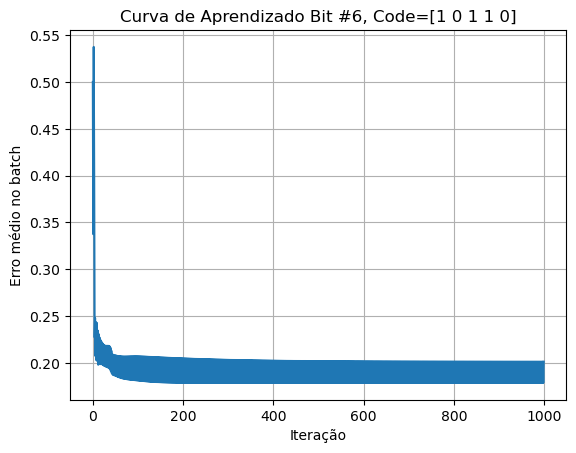

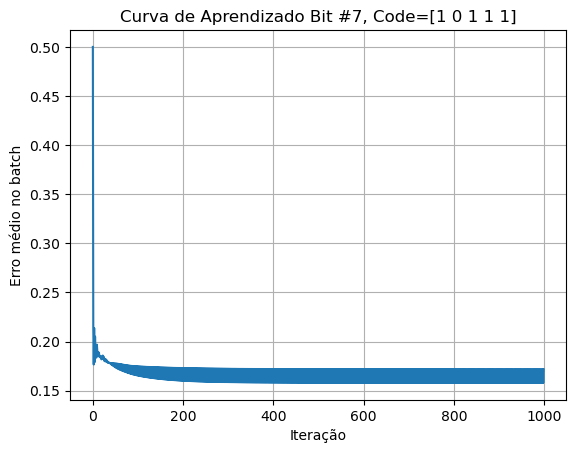

In [103]:
for i, errors in enumerate(model.get_errors()):
    # Plot da curva de aprendizado
    plt.figure()
    plt.plot(errors)
    plt.title(f"Curva de Aprendizado Bit #{i}, Code={model.codes[:,i]}")
    plt.xlabel("Iteração")
    plt.ylabel("Erro médio no batch")
    plt.grid(True)
    plt.show()